# [PRELIMINARY][NOT READY] UDMIS via QIGA

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

**Algorithm Parameters**

In [3]:
N=20                  # Population size
Genome=6              # Chromosome length
generation_max=200    # Maximum number of generations/iterations

**Variable Algorithm**

In [4]:
popSize=N+1
genomeLength=Genome+1
top_bottom=3
QuBitZero = np.array([[1],[0]])
QuBitOne = np.array([[0],[1]])
AlphaBeta = np.empty([top_bottom])
fitness = np.empty([popSize])
probability = np.empty([popSize])
# qpv: quantum chromosome (or population vector, QPV)
qpv = np.empty([popSize, genomeLength, top_bottom])         
nqpv = np.empty([popSize, genomeLength, top_bottom])
# chromosome: classical chromosome
chromosome = np.empty([popSize, genomeLength],dtype=np.int) 
child1 = np.empty([popSize, genomeLength, top_bottom])
child2 = np.empty([popSize, genomeLength, top_bottom])
best_chrom = np.empty([generation_max])

/var/folders/s5/nw5tmhys4dxbjvwyls5lg2hm0000gn/T/ipykernel_19273/2832696205.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chromosome = np.empty([popSize, genomeLength],dtype=np.int)


In [5]:
# Initialization global variables
theta=0;
iteration=0;
the_best_chrom=0;
generation=0;

**Quantum Population Initialization**

In [6]:
def Init_population():
    # Hadamard gate
    r2=math.sqrt(2.0)
    h=np.array([[1/r2,1/r2],[1/r2,-1/r2]])
    # Rotation Q-gate
    theta=0;
    rot =np.empty([2,2])
    # Initial population array (individual x chromosome)
    i=1; j=1;
    for i in range(1,popSize):
        for j in range(1,genomeLength):
            theta=np.random.uniform(0,1)*90
            theta=math.radians(theta)
            rot[0,0]=math.cos(theta); rot[0,1]=-math.sin(theta);
            rot[1,0]=math.sin(theta); rot[1,1]=math.cos(theta);
            AlphaBeta[0]=rot[0,0]*(h[0][0]*QuBitZero[0])+rot[0,1]*(h[0][1]*QuBitZero[1])
            AlphaBeta[1]=rot[1,0]*(h[1][0]*QuBitZero[0])+rot[1,1]*(h[1][1]*QuBitZero[1])
            # alpha squared          
            qpv[i,j,0]=np.around(2*pow(AlphaBeta[0],2),2) 
            # beta squared
            qpv[i,j,1]=np.around(2*pow(AlphaBeta[1],2),2) 

**Show Quantum Population**

In [7]:
def Show_population():
    i=1; j=1;
    for i in range(1,popSize):
        print()
        print()
        print("qpv = ",i," : ")
        print()
        for j in range(1,genomeLength):
            print(qpv[i, j, 0])
            print(" ")
        print()
        for j in range(1,genomeLength):
            print(qpv[i, j, 1])
            print(" ")
    print()

**Measure**

In [8]:
# p_alpha: probability of finding qubit in alpha state
def Measure(p_alpha):
    for i in range(1,popSize):
        print()
        for j in range(1,genomeLength):
            if p_alpha<=qpv[i, j, 0]:
                chromosome[i,j]=0
            else:
                chromosome[i,j]=1
            print(chromosome[i,j]," ")
        print()
    print()

**Fitness Evaluation**

In [10]:
def Fitness_evaluation(generation):
    i=1; j=1; fitness_total=0; sum_sqr=0;
    fitness_average=0; variance=0;
    for i in range(1,popSize):
        fitness[i]=0
#########################################################
# Define your problem in this section. For instance:    #
#                                                       #
# Let f(x)=abs(x-5/2+sin(x)) be a function that takes   #
# values in the range 0<=x<=15. Within this range f(x)  #
# has a maximum value at x=11 (binary is equal to 1011) #
#########################################################
    for i in range(1,popSize):
        x=0;
        for j in range(1,genomeLength):
           # translate from binary to decimal value
           x=x+chromosome[i,j]*pow(2,genomeLength-j-1)
           # replaces the value of x in the function f(x)
           y= np.fabs((x-5)/(2+np.sin(x)))
           # the fitness value is calculated below:
           # (Note that in this example is multiplied
           # by a scale value, e.g. 100)
           fitness[i]=y
#########################################################
      
        print("fitness = ",i," ",fitness[i])
        fitness_total=fitness_total+fitness[i]
      
        #Here's where I'll pick it up. I'll need to load
        #a .csv to get the fitness_total calculated to continue
        #the script here.
        #It looks like this is in the middle of a defined function,
        #so we'll probably need a different function defined that starts
        #at this poin in the code.
       
       
    fitness_average=fitness_total/N
    i=1;
    while i<=N:
        sum_sqr=sum_sqr+pow(fitness[i]-fitness_average,2)
        i=i+1
    variance=sum_sqr/N
    if variance<=1.0e-4:
        variance=0.0
    # Best chromosome selection
    the_best_chrom=0;
    fitness_max=fitness[1];
    for i in range(1,popSize):
        if fitness[i]>=fitness_max:
            fitness_max=fitness[i]
            the_best_chrom=i
    best_chrom[generation]=the_best_chrom
    # Statistical output
    f = open("output.dat","a")
    f.write(str(generation)+" "+str(fitness_average)+"\n")
    f.write(" \n")
    f.close()
    print("Population size = ",popSize - 1)
    print("mean fitness = ",fitness_average)
    print("variance = ",variance," Std. deviation = ",math.sqrt(variance))
    print("fitness max = ",best_chrom[generation])
    print("fitness sum = ",fitness_total)

**Quantum Rotation Gate**

In [11]:
def rotation():
    rot=np.empty([2,2])
    # Lookup table of the rotation angle
    for i in range(1,popSize):
        for j in range(1,genomeLength):
            if fitness[i]<fitness[int(best_chrom[generation])]:
                # if chromosome[i,j]==0 and chromosome[best_chrom[generation],j]==0:
                if chromosome[i,j]==0 and chromosome[int(best_chrom[generation]),j]==1:
                    # Define the rotation angle: delta_theta (e.g. 0.0785398163)
                    delta_theta=0.0785398163
                    rot[0,0]=math.cos(delta_theta); rot[0,1]=-math.sin(delta_theta);
                    rot[1,0]=math.sin(delta_theta); rot[1,1]=math.cos(delta_theta);
                    nqpv[i,j,0]=(rot[0,0]*qpv[i,j,0])+(rot[0,1]*qpv[i,j,1])
                    nqpv[i,j,1]=(rot[1,0]*qpv[i,j,0])+(rot[1,1]*qpv[i,j,1])
                    qpv[i,j,0]=round(nqpv[i,j,0],2)
                    qpv[i,j,1]=round(1-nqpv[i,j,0],2)
                if chromosome[i,j]==1 and chromosome[int(best_chrom[generation]),j]==0:
                    # Define the rotation angle: delta_theta (e.g. -0.0785398163)
                    delta_theta=-0.0785398163
                    rot[0,0]=math.cos(delta_theta); rot[0,1]=-math.sin(delta_theta);
                    rot[1,0]=math.sin(delta_theta); rot[1,1]=math.cos(delta_theta);
                    nqpv[i,j,0]=(rot[0,0]*qpv[i,j,0])+(rot[0,1]*qpv[i,j,1])
                    nqpv[i,j,1]=(rot[1,0]*qpv[i,j,0])+(rot[1,1]*qpv[i,j,1])
                    qpv[i,j,0]=round(nqpv[i,j,0],2)
                    qpv[i,j,1]=round(1-nqpv[i,j,0],2)
                # if chromosome[i,j]==1 and chromosome[best_chrom[generation],j]==1:

**X-Pauli Quantum Mutation Gate**

In [12]:
# pop_mutation_rate: mutation rate in the population
# mutation_rate: probability of a mutation of a bit
def mutation(pop_mutation_rate, mutation_rate):
    uallele=0;
    for i in range(1,popSize):
        up=np.random.random_integers(100)
        up=up/100
        if up<=pop_mutation_rate:
            for j in range(1,genomeLength):
                ualelle=up=np.random.random_integers(100)
                ualelle=ualelle/100
                if uallele<=mutation_rate:
                    nqpv[i,j,0]=qpv[i,j,1]
                    nqpv[i,j,1]=qpv[i,j,0]
                else:
                    nqpv[i,j,0]=qpv[i,j,0]
                    nqpv[i,j,1]=qpv[i,j,1]
        else:
            for j in range(1,genomeLength):
                nqpv[i,j,0]=qpv[i,j,0]
                nqpv[i,j,1]=qpv[i,j,1]
    for i in range(1,popSize):
        for j in range(1,genomeLength):
            qpv[i,j,0]=nqpv[i,j,0]
            qpv[i,j,1]=nqpv[i,j,1]

**Performance Graph**

In [13]:
# Read the Docs in http://matplotlib.org/1.4.1/index.html
def plot_Output():
    data = np.loadtxt('output.dat')
    # plot the first column as x, and second column as y
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y)
    plt.xlabel('Generation')
    plt.ylabel('Fitness average')
    plt.xlim(0.0, 550.0)
    plt.show()

**Main Program**

In [14]:
def Q_GA():
    generation=0;
    print("============== GENERATION: ",generation," =========================== ")
    print()
    Init_population()
    Show_population()
    Measure(0.75)
    Fitness_evaluation(generation)
    while (generation<generation_max-1):
        print("The best of generation [",generation,"] ", best_chrom[generation])
        print()
        print("============== GENERATION: ",generation+1," =========================== ")
        print()
        rotation()
        mutation(0.25,0.1)
        generation=generation+1
        Measure(0.5)
        Fitness_evaluation(generation)

QUANTUM GENETIC ALGORITHM

============== GENERATION:  0  =========================== 



qpv =  1  : 

0.95
 
0.23
 
0.38
 
0.91
 
0.9
 
0.25
 

0.05
 
0.77
 
0.62
 
0.09
 
0.1
 
0.75
 


qpv =  2  : 

1.0
 
0.09
 
0.37
 
0.4
 
0.31
 
0.9
 

0.0
 
0.91
 
0.63
 
0.6
 
0.69
 
0.1
 


qpv =  3  : 

0.12
 
0.3
 
0.99
 
0.05
 
0.72
 
0.6
 

0.88
 
0.7
 
0.01
 
0.95
 
0.28
 
0.4
 


qpv =  4  : 

0.47
 
0.04
 
0.08
 
0.04
 
0.95
 
0.99
 

0.53
 
0.96
 
0.92
 
0.96
 
0.05
 
0.01
 


qpv =  5  : 

0.96
 
0.95
 
0.95
 
0.68
 
0.36
 
0.06
 

0.04
 
0.05
 
0.05
 
0.32
 
0.64
 
0.94
 


qpv =  6  : 

0.98
 
0.91
 
0.14
 
0.21
 
0.16
 
0.23
 

0.02
 
0.09
 
0.86
 
0.79
 
0.84
 
0.77
 


qpv =  7  : 

0.83
 
0.98
 
0.06
 
0.71
 
0.26
 
1.0
 

0.17
 
0.02
 
0.94
 
0.29
 
0.74
 
0.0
 


qpv =  8  : 

0.0
 
0.7
 
0.59
 
0.28
 
0.98
 
0.16
 

1.0
 
0.3
 
0.41
 
0.72
 
0.02
 
0.84
 


qpv =  9  : 

0.1
 
0.09
 
0.92
 
0.55
 
0.74
 
0.72
 

0.9
 
0.91
 
0.08
 
0.45
 
0.26
 
0.28
 


qpv =  10  : 

0.99
 

/var/folders/s5/nw5tmhys4dxbjvwyls5lg2hm0000gn/T/ipykernel_19273/3654442054.py:9: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  up=np.random.random_integers(100)
/var/folders/s5/nw5tmhys4dxbjvwyls5lg2hm0000gn/T/ipykernel_19273/3654442054.py:13: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  ualelle=up=np.random.random_integers(100)



1  


1  
1  
0  
1  
0  
0  


0  
1  
1  
1  
0  
0  


0  
0  
0  
0  
0  
1  


1  
1  
0  
0  
0  
0  


0  
0  
1  
0  
1  
0  


1  
0  
0  
1  
0  
1  


0  
0  
1  
1  
1  
1  


0  
0  
0  
1  
1  
0  


1  
0  
0  
1  
0  
1  


1  
0  
0  
1  
1  
0  


1  
1  
1  
1  
0  
1  


1  
0  
1  
1  
0  
1  


1  
1  
1  
1  
1  
0  


0  
0  
0  
0  
0  
0  


0  
1  
1  
1  
0  
0  


1  
1  
0  
0  
0  
1  


0  
1  
0  
0  
1  
0  


0  
1  
0  
1  
0  
1  


fitness =  1   14.370515389366108
fitness =  2   9.333607554389552
fitness =  3   15.736813027930697
fitness =  4   10.12811721138731
fitness =  5   1.4077215714628977
fitness =  6   34.90981345722725
fitness =  7   3.4341157261244355
fitness =  8   23.590784810777063
fitness =  9   3.7731750674323625
fitness =  10   0.5811978423339392
fitness =  11   23.590784810777063
fitness =  12   14.370515389366108
fitness =  13   54.164776582391404
fitness =  14   14.030639639598682
fitness =  15   45.20869869973892
fitness =  16

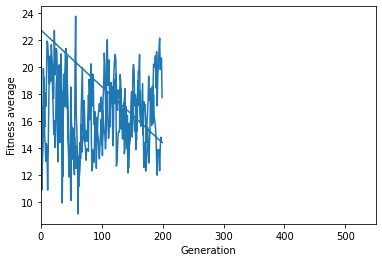

7.6016491149189

In [16]:
print ("""QUANTUM GENETIC ALGORITHM\n""")
#input("Press Enter to continue...")
Q_GA()
plot_Output()
bestlast=best_chrom[generation]
bestlast
chromosome[int(bestlast),1:]
fitness[int(bestlast)]